Title and description

In [ ]:
# 01 - Data Exploration: Deepfake Detection

Goal: explore the Deepfake Detection Challenge sample dataset, understand the labels, and inspect class balance and basic structure of the data.

Dataset: Kaggle Deepfake Detection Challenge (sample set).  
Files used here:
- `data/raw/train_sample_videos/metadata.json` - labels for sample training videos  
- `data/raw/train_sample_videos/*.mp4` - real and fake face videos  
- `data/raw/test_videos/*.mp4` - unlabeled test videos

Imports

In [2]:
import os
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load metadata.json into a DataFrame

In [7]:
from pathlib import Path
import json
import pandas as pd

# project root is one level up from the notebooks/ folder
project_root = Path("..").resolve()

# data/raw under project root
data_root = project_root / "data" / "raw"

meta_path = data_root / "train_sample_videos" / "metadata.json"
print(meta_path, meta_path.exists())

with open(meta_path, "r") as f:
    meta = json.load(f)

len(meta), list(meta.items())[:3]

rows = []
for fname, info in meta.items():
    rows.append(
        {
            "filename": fname,
            "label": info["label"],          # "FAKE" or "REAL"
            "original": info.get("original") # original real video, if available
        }
    )

df = pd.DataFrame(rows)
df.head()

C:\Users\adamc\Documents\Fall 25\Machine and Deep Learning\CSC422_DeepfakeDetection_Final_Aguilar_Adam\data\raw\train_sample_videos\metadata.json True


,filename,label,original
0,aagfhgtpmv.mp4,FAKE,vudstovrck.mp4
1,aapnvogymq.mp4,FAKE,jdubbvfswz.mp4
2,abarnvbtwb.mp4,REAL,None
3,abofeumbvv.mp4,FAKE,atvmxvwyns.mp4
4,abqwwspghj.mp4,FAKE,qzimuostzz.mp4


In [8]:
with open(meta_path, "r") as f:
    meta = json.load(f)

len(meta), list(meta.items())[:3]

(400,
 [('aagfhgtpmv.mp4',
   {'label': 'FAKE', 'split': 'train', 'original': 'vudstovrck.mp4'}),
  ('aapnvogymq.mp4',
   {'label': 'FAKE', 'split': 'train', 'original': 'jdubbvfswz.mp4'}),
  ('abarnvbtwb.mp4', {'label': 'REAL', 'split': 'train', 'original': None})])

In [9]:
rows = []
for fname, info in meta.items():
    rows.append(
        {
            "filename": fname,
            "label": info["label"],          # "FAKE" or "REAL"
            "original": info.get("original") # original real video, if available
        }
    )

df = pd.DataFrame(rows)
df.head()

,filename,label,original
0,aagfhgtpmv.mp4,FAKE,vudstovrck.mp4
1,aapnvogymq.mp4,FAKE,jdubbvfswz.mp4
2,abarnvbtwb.mp4,REAL,None
3,abofeumbvv.mp4,FAKE,atvmxvwyns.mp4
4,abqwwspghj.mp4,FAKE,qzimuostzz.mp4


Basic stats and class balance

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  400 non-null    object
 1   label     400 non-null    object
 2   original  323 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [11]:
df["label"].value_counts()

label
FAKE    323
REAL     77
Name: count, dtype: int64

In [12]:
df["label"].value_counts(normalize=True)

label
FAKE    0.8075
REAL    0.1925
Name: proportion, dtype: float64

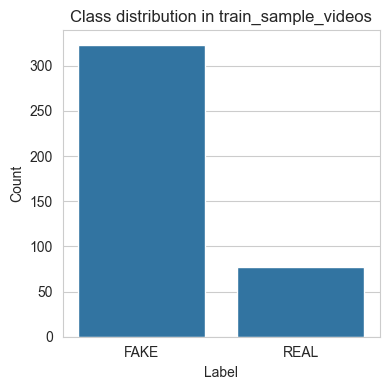

In [13]:
sns.set_style("whitegrid")

plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="label")
plt.title("Class distribution in train_sample_videos")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Check example filenames

In [14]:
df.sample(10, random_state=42)

,filename,label,original
209,cmbzllswnl.mp4,REAL,None
280,diuzrpqjli.mp4,FAKE,smggzgxymo.mp4
33,akzbnazxtz.mp4,FAKE,ppdpgwyjgm.mp4
210,cmxcfkrjiv.mp4,FAKE,ztbinwxgyu.mp4
93,bdbhekrrwo.mp4,FAKE,qtnjyomzwo.mp4
84,aytzyidmgs.mp4,REAL,None
329,dzvyfiarrq.mp4,FAKE,bgwmmujlmc.mp4
94,bddjdhzfze.mp4,REAL,None
266,dfbpceeaox.mp4,FAKE,bffwsjxghk.mp4
126,bmioepcpsx.mp4,FAKE,vmospzljws.mp4


In [15]:
train_files = [f for f in (data_root / "train_sample_videos").iterdir() if f.suffix == ".mp4"]
test_files = [f for f in (data_root / "test_videos").iterdir() if f.suffix == ".mp4"]

len(train_files), len(test_files)

(400, 400)